# G2M insight for Cab Investment firm (EDA)

#### Problem Statment

- XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

#### Objectives

- To invest in Cab industry and as per the private firm's Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

#### Data Set:

There have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.Below are the list of datasets which are provided for the analysis:

- Cab_Data.csv – this file includes details of transaction for 2 cab companies

- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

- City.csv – this file contains list of US cities, their population and number of cab users

#### The main goal is to compare Yellow Cab and Pink Cab from Different Aspects:
    
    1. How is the performance of Yellow Cab and Pink Cab firms?
    2. Which Cap firm is prefered by the customers?
    3. Which Cap firm covers more in the Cities?
    4. Which Cab firm have bigger market share?
    5. Which Cap firm has increaed profit?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go

# Functions

In [2]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [3]:
cityData = pd.read_csv("D:/My Courses/DS internship/week2/G2M insight for Cab Investment firm-Data Set/DataSets/City.csv")

In [4]:
cabData = pd.read_csv("D:/My Courses//DS internship/week2/G2M insight for Cab Investment firm-Data Set/DataSets/Cab_Data.csv")

In [5]:
customerData = pd.read_csv("D:/My Courses/DS internship/week2/G2M insight for Cab Investment firm-Data Set/DataSets/Customer_ID.csv")

In [6]:
transactionData = pd.read_csv("D:/My Courses/DS internship/week2/G2M insight for Cab Investment firm-Data Set/DataSets/Transaction_ID.csv")

# 1.Understanding data (the field names and data types)

### - Cab Dataset

In [7]:
from datetime import datetime, timedelta

In [8]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date


### Time Analysis- Date conversion

In [9]:
cabData['Date of Travel']=cabData['Date of Travel'].apply(lambda x:to_date_format(x))

In [10]:
cabData['year'] = cabData['Date of Travel'].dt.year
cabData['month'] = pd.DatetimeIndex(cabData['Date of Travel']).month
cabData.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-06  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-02  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  year  month  
0         370.95       313.635  2016      1  
1         358.52       334.854  2016      1  
2         125.20        97.632  2016      1  
3         377.40       351.602  2016      1  
4         114.62        97.776  2016      1

In [11]:
cabData.tail()

Transaction ID Date of Travel     Company           City  \
359387        10440101     2018-01-07  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-03  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-04  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-04  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-01  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  year  month  
359387          4.80          69.24       63.3600  2018      1  
359388          8.40         113.75      106.8480  2018      1  
359389         27.75         437.07      349.6500  2018      1  
359390          8.80         146.19      114.0480  2018      1  
359391         12.76         191.58      177.6192  2018      1

In [12]:
cabData.describe().round(2)

Transaction ID  KM Travelled  Price Charged  Cost of Trip       year  \
count       359392.00     359392.00      359392.00     359392.00  359392.00   
mean      10220761.19         22.57         423.44        286.19    2017.04   
std         126805.80         12.23         274.38        157.99       0.80   
min       10000011.00          1.90          15.60         19.00    2016.00   
25%       10110809.75         12.00         206.44        151.20    2016.00   
50%       10221035.50         22.44         386.36        282.48    2017.00   
75%       10330937.25         32.96         583.66        413.68    2018.00   
max       10440107.00         48.00        2048.03        691.20    2018.00   

           month  
count  359392.00  
mean        7.51  
std         3.43  
min         1.00  
25%         5.00  
50%         8.00  
75%        11.00  
max        12.00

In [13]:
cabData.shape

(359392, 9)

In [14]:
cabData.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'year', 'month'],
      dtype='object')

In [15]:
cabData.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
year                   3
month                 12
dtype: int64

In [16]:
cabData['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [17]:
cabData['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [18]:
cabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   year            359392 non-null  int64         
 8   month           359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 24.7+ MB


### - City Dataset

In [19]:
cityData.head(20)

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [20]:
cityData.describe()

City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

In [21]:
cityData.shape

(20, 3)

In [22]:
cityData.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [23]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### - Customer Dataset

In [24]:
customerData.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [25]:
customerData.tail()

Customer ID  Gender  Age  Income (USD/Month)
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

In [26]:
customerData.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [27]:
customerData.shape

(49171, 4)

In [28]:
customerData.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [29]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [30]:
cityData['Population'] = [x.replace(',','') for x in cityData['Population']]
cityData['Users'] = [x.replace(',','') for x in cityData['Users']]
cityData['Population'] = cityData['Population'].astype(float)
cityData['Users'] = cityData['Users'].astype(float)
cityData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [31]:
customerData.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [32]:
customerData['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
customerData['Age'].unique()

array([28, 27, 53, 23, 33, 25, 19, 57, 20, 63, 58, 29, 38, 31, 40, 22, 18,
       34, 21, 24, 44, 30, 26, 46, 62, 47, 43, 32, 60, 52, 51, 48, 39, 45,
       61, 54, 37, 42, 41, 35, 36, 64, 55, 49, 50, 56, 65, 59],
      dtype=int64)

### - Transaction Dataset

In [34]:
transactionData.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [35]:
transactionData.tail()

Transaction ID  Customer ID Payment_Mode
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

In [36]:
transactionData.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [37]:
transactionData.shape

(440098, 3)

In [38]:
transactionData.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [39]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [40]:
transactionData.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [41]:
transactionData['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

# 2.Identify relationships across the files

#### Comments:

- cab_data file has unuique columns Transaction_ID
- transaction_data file has unuique columns Transaction_ID
- Transaction_ID is common column between cab_data and transaction_data
- transaction_data fils contains the customers how take the ride in data_cab in specific city, the common column between transaction_data and customer_data is Customer ID
- So all files are has relationship so they can be merged to create master dataset.

In [42]:
master_ds= pd.merge(transactionData,customerData).merge(cabData, on='Transaction ID' ).merge(cityData, on = 'City')
master_ds.head()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

  Date of Travel     Company        City  KM Travelled  Price Charged  \
0     2016-01-07    Pink Cab  ATLANTA GA         30.45         370.95   
1     2018-07-20  Yellow Cab  ATLANTA GA         26.19         598.70   
2     2018-11-22  Yellow Cab  ATLANTA GA         42.55         792.05   
3     2016-01-05    Pink Cab  ATLANTA GA         28.62         358.52   
4     2018-04-20  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip  year  month  Population    Users  
0      313.6350  2016      1    814885.0  24701.0  
1      317.4228  2018      7    814885.0  24701.0  
2      597.4020  2018     11    814885.0  24701.0  
3      334.8540  2016      1    814885.0  24701.0  
4      467.1192  2018      4    814885.0  24701.0

In [43]:
master_ds.tail()

Transaction ID  Customer ID Payment_Mode  Gender  Age  \
359387        10307228        51406         Cash  Female   29   
359388        10319775        51406         Cash  Female   29   
359389        10347676        51406         Card  Female   29   
359390        10358624        51406         Cash  Female   29   
359391        10370709        51406         Card  Female   29   

        Income (USD/Month) Date of Travel     Company           City  \
359387                6829     2018-03-02  Yellow Cab  WASHINGTON DC   
359388                6829     2018-04-12  Yellow Cab  WASHINGTON DC   
359389                6829     2018-07-05  Yellow Cab  WASHINGTON DC   
359390                6829     2018-08-01  Yellow Cab  WASHINGTON DC   
359391                6829     2018-08-29  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  year  month  Population  \
359387         38.40         668.93      525.3120  2018      3    418859.0   
359388          3.57          67.60       44.5536  2018      4    418859.0   
359389         23.46         331.97      337.8240  2018      7    418859.0   
359390         27.60         358.23      364.3200  2018      8    418859.0   
359391         34.24         453.11      427.3152  2018      8    418859.0   

           Users  
359387  127001.0  
359388  127001.0  
359389  127001.0  
359390  127001.0  
359391  127001.0

#### All files is merged in one maser dataset customer_cap_transactions and ready for cleaning.


In [44]:
master_ds.shape

(359392, 16)

Generate the descriptive statistics to get the basic quantitative information about the features of our data set.

In [45]:
master_ds.describe()

Transaction ID    Customer ID            Age  Income (USD/Month)  \
count    3.593920e+05  359392.000000  359392.000000       359392.000000   
mean     1.022076e+07   19191.652115      35.336705        15048.822937   
std      1.268058e+05   21012.412463      12.594234         7969.409482   
min      1.000001e+07       1.000000      18.000000         2000.000000   
25%      1.011081e+07    2705.000000      25.000000         8424.000000   
50%      1.022104e+07    7459.000000      33.000000        14685.000000   
75%      1.033094e+07   36078.000000      42.000000        21035.000000   
max      1.044011e+07   60000.000000      65.000000        35000.000000   

        KM Travelled  Price Charged   Cost of Trip           year  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean       22.567254     423.443311     286.190113    2017.041693   
std        12.233526     274.378911     157.993661       0.801378   
min         1.900000      15.600000      19.000000    2016.000000   
25%        12.000000     206.437500     151.200000    2016.000000   
50%        22.440000     386.360000     282.480000    2017.000000   
75%        32.960000     583.660000     413.683200    2018.000000   
max        48.000000    2048.030000     691.200000    2018.000000   

               month    Population          Users  
count  359392.000000  3.593920e+05  359392.000000  
mean        7.509243  3.132198e+06  158365.582267  
std         3.428929  3.315194e+06  100850.051020  
min         1.000000  2.489680e+05    3643.000000  
25%         5.000000  6.712380e+05   80021.000000  
50%         8.000000  1.595037e+06  144132.000000  
75%        11.000000  8.405837e+06  302149.000000  
max        12.000000  8.405837e+06  302149.000000

# 3.Cleanning & Preparing data

### - Check Master Dataset datatypes and null values

In [46]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

### Comment

### - Check null values

In [47]:
master_ds.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
year                  0
month                 0
Population            0
Users                 0
dtype: int64

### -  Analyse missing data

In [48]:
draw_missing_data_table(master_ds)

Total  Percent
Transaction ID          0      0.0
Customer ID             0      0.0
Payment_Mode            0      0.0
Gender                  0      0.0
Age                     0      0.0
Income (USD/Month)      0      0.0
Date of Travel          0      0.0
Company                 0      0.0
City                    0      0.0
KM Travelled            0      0.0
Price Charged           0      0.0
Cost of Trip            0      0.0
year                    0      0.0
month                   0      0.0
Population              0      0.0
Users                   0      0.0

In [49]:
duplicated_rows = master_ds[master_ds.duplicated()]
print('Duplicated rows:', duplicated_rows.shape[0])

Duplicated rows: 0


Comment:

- No missing data in our dataset
- No Duplicated rows
- No null values retreived

### - Detect Outliers

The box plot will show if there are outliers in our dataset variables.

In [50]:
# master_ds['KM_Travelled'] = master_ds.index
# master_ds['Price_Charged'] = master_ds.index
# master_ds['Cost_of_Trip'] = master_ds.index
# master_ds['Population'] = master_ds.index

<AxesSubplot:xlabel='Income (USD/Month)'>

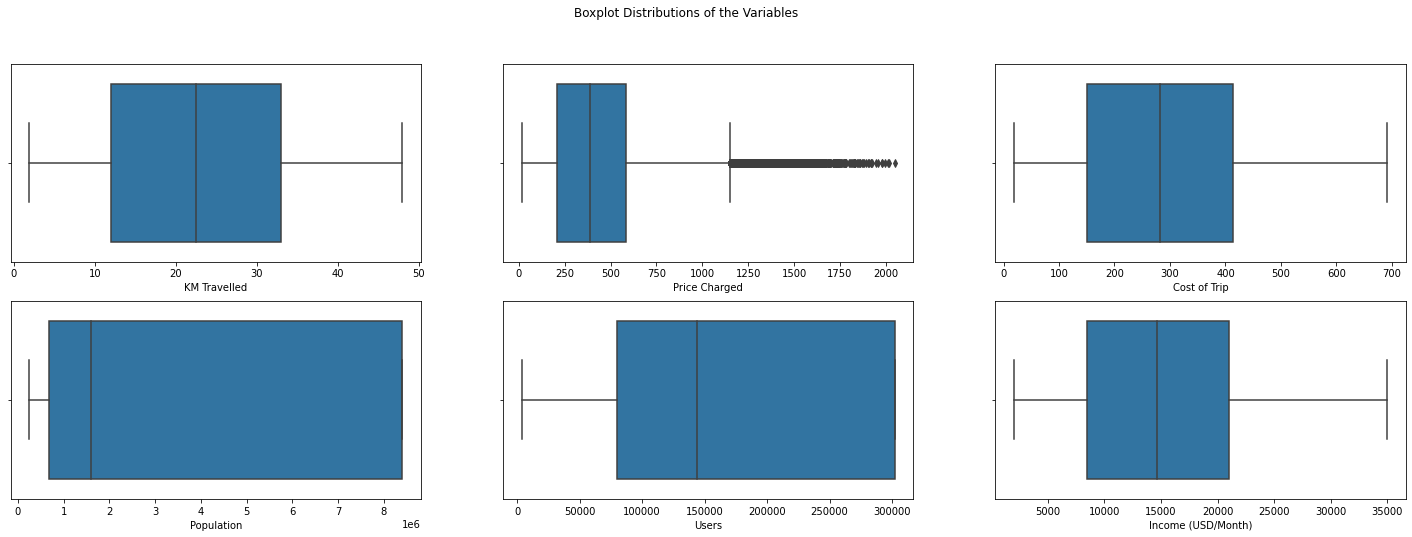

In [51]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
master_ds_domintional=master_ds

sns.boxplot(ax=axes[0,0], x='KM Travelled' , data=master_ds_domintional)
sns.boxplot(ax=axes[0,1], x='Price Charged'  , data=master_ds_domintional) 
sns.boxplot(ax=axes[0,2], x='Cost of Trip' ,   data=master_ds_domintional)
sns.boxplot(ax=axes[1,0], x='Population' ,   data=master_ds_domintional)
sns.boxplot(ax=axes[1,1], x='Users' ,   data=master_ds_domintional)
sns.boxplot(ax=axes[1,2], x='Income (USD/Month)' ,   data=master_ds_domintional)


We have outliers only in Price Changed variable, So we will calculate it

In [52]:
def outlier(col:str, df_:pd.DataFrame=master_ds, remove:bool=False) -> list:
    """This function calculates the upper and lower fence
    of any column and can also remove from the dataset"""
    q1 = df_[col].quantile(0.25)
    q3 = df_[col].quantile(0.75)
    
    iqr = q3-q1
    lower_fence = q1 - iqr*1.5
    upper_fence = q3 + iqr*1.5

    if remove:
        temp = df_[(df_[col] > lower_fence) & (df_[col] < upper_fence)]
        return temp
    print('Upper and Lower Limits of KM_Travelled is:')
    return  [lower_fence, upper_fence]

In [53]:
outlier('Price Charged')

Upper and Lower Limits of KM_Travelled is:


[-359.39625, 1149.49375]

In [54]:
# Convert some columns from object to category or from float to int64 datatypes to work with appropriate ones.

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        master_ds[column] = master_ds[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        master_ds[column] = master_ds[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(master_ds.dtypes))


Feature's datatypes

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
year                           int64
month                          int64
Population                     int64
Users                          int64
dtype: object


In [55]:
master_ds.head()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

  Date of Travel     Company        City  KM Travelled  Price Charged  \
0     2016-01-07    Pink Cab  ATLANTA GA         30.45         370.95   
1     2018-07-20  Yellow Cab  ATLANTA GA         26.19         598.70   
2     2018-11-22  Yellow Cab  ATLANTA GA         42.55         792.05   
3     2016-01-05    Pink Cab  ATLANTA GA         28.62         358.52   
4     2018-04-20  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip  year  month  Population  Users  
0      313.6350  2016      1      814885  24701  
1      317.4228  2018      7      814885  24701  
2      597.4020  2018     11      814885  24701  
3      334.8540  2016      1      814885  24701  
4      467.1192  2018      4      814885  24701

### Time Series Analysis

In [56]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  category      
 3   Gender              359392 non-null  category      
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  category      
 8   City                359392 non-null  category      
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

In [57]:
# Seprate the master dateset in to pink_dataset and yellow_dataset
pink_dataset = master_ds [master_ds['Company'] == 'Pink Cab'] 
yellow_dataset = master_ds [master_ds['Company'] == 'Yellow Cab']

according to the above pink_dataset and yellow_dataset we will start our analysis

# 5. Features Analysis

#### Count the categorical variables (Company, Payment Method, and Gander) 

In [58]:
p_master_ds_domintional= pink_dataset
y_master_ds_domintional=yellow_dataset 

Text(0, 0.5, 'Yellow Cab')

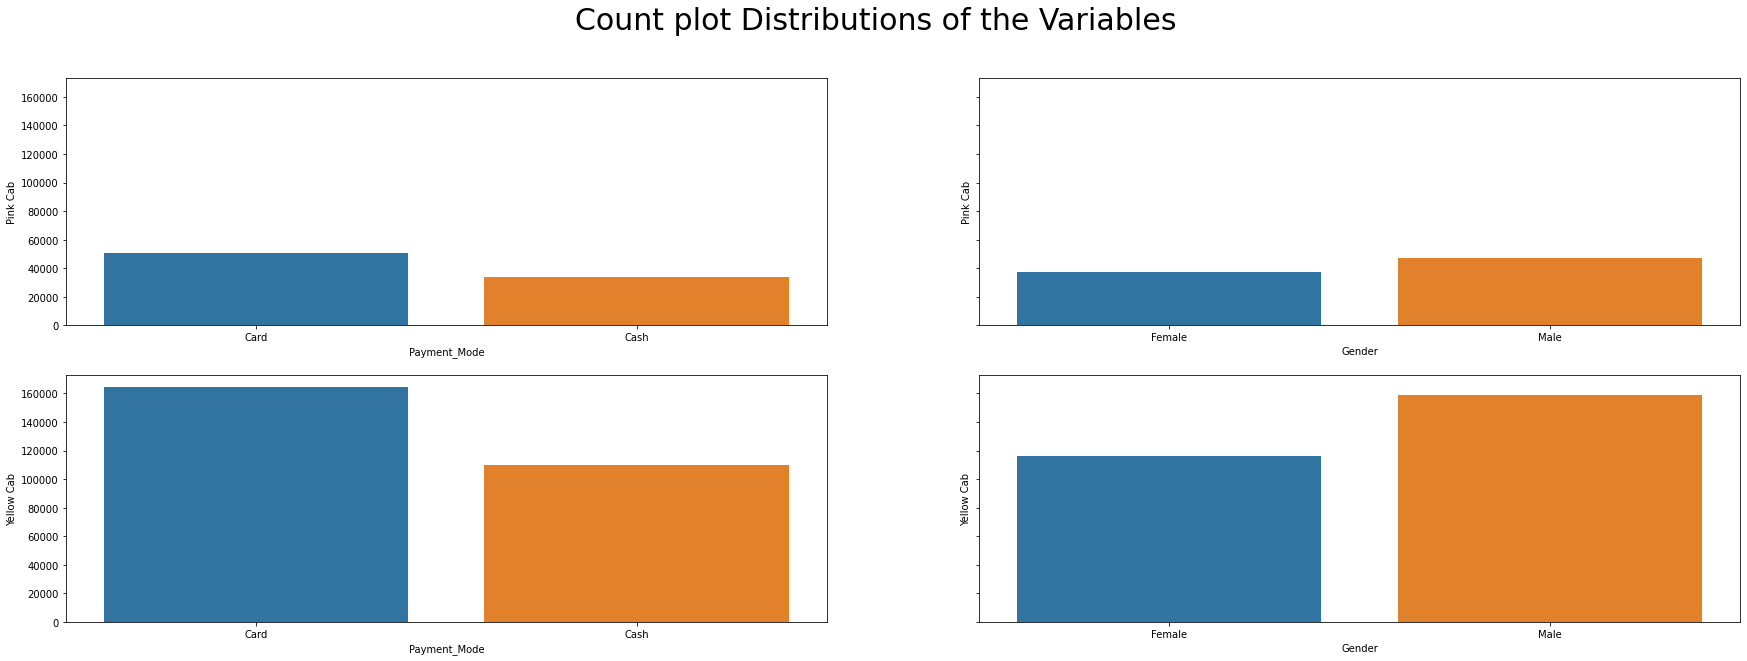

In [59]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10), sharey=True)

fig.suptitle('Count plot Distributions of the Variables', fontsize=30)

# sns.countplot(ax=axes[0,0], x='Company' , data=p_master_ds_domintional).set_ylabel("Pink Cab")
sns.countplot(ax=axes[0,0], x='Payment_Mode'  , data=p_master_ds_domintional) .set_ylabel("Pink Cab")
sns.countplot(ax=axes[0,1], x='Gender' ,   data=p_master_ds_domintional).set_ylabel("Pink Cab")

# sns.countplot(ax=axes[1,0], x='Company' , data=y_master_ds_domintional).set_ylabel("Yellow Cab")
sns.countplot(ax=axes[1,0], x='Payment_Mode'  , data=y_master_ds_domintional).set_ylabel("Yellow Cab") 
sns.countplot(ax=axes[1,1], x='Gender' ,   data=y_master_ds_domintional).set_ylabel("Yellow Cab")

Text(0.5, 0, 'Age')

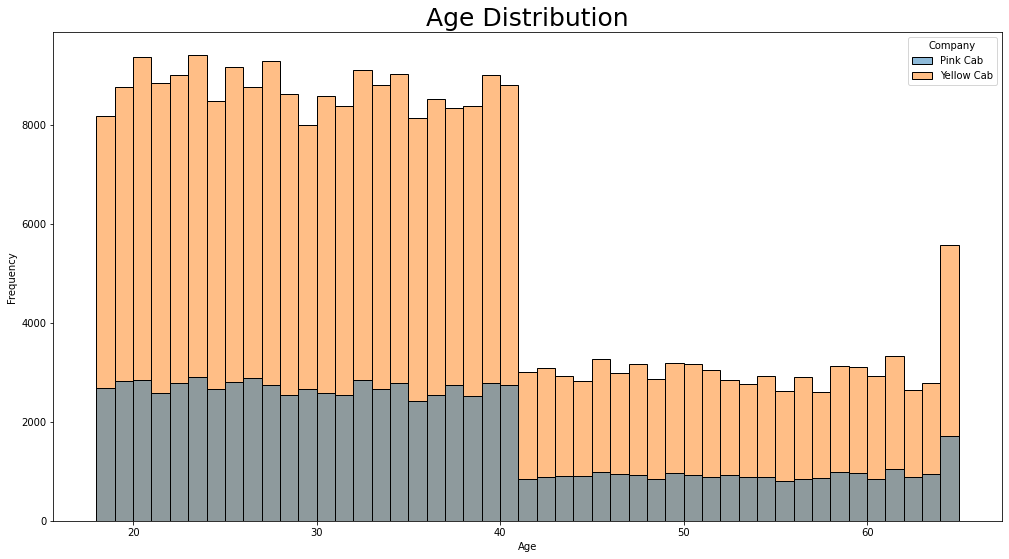

In [60]:
plt.figure(figsize=(17,9))
pal = ['#9b59b6', '#e74c3c']
sns.histplot(data=master_ds, x='Age', bins=47, hue="Company")
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

Text(0.5, 1.0, 'Age for Yellow Cap')

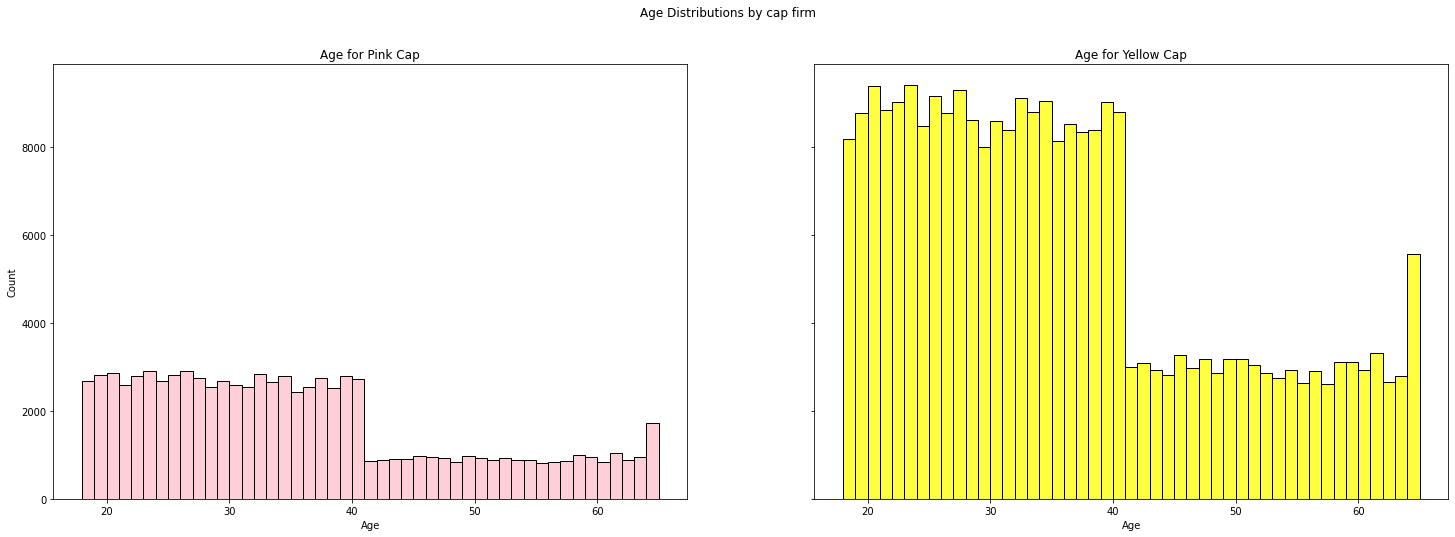

In [61]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle("Age Distributions by cap firm")
sns.histplot(ax=axes[0],data=pink_dataset, x='Age',  color="pink", bins=47).set_title("Age for Pink Cap")
sns.histplot(ax=axes[1],data=yellow_dataset, x='Age',color="yellow"  , bins=47).set_title("Age for Yellow Cap")

#### KM Travelled

Text(0.5, 0, 'Km Travelled')

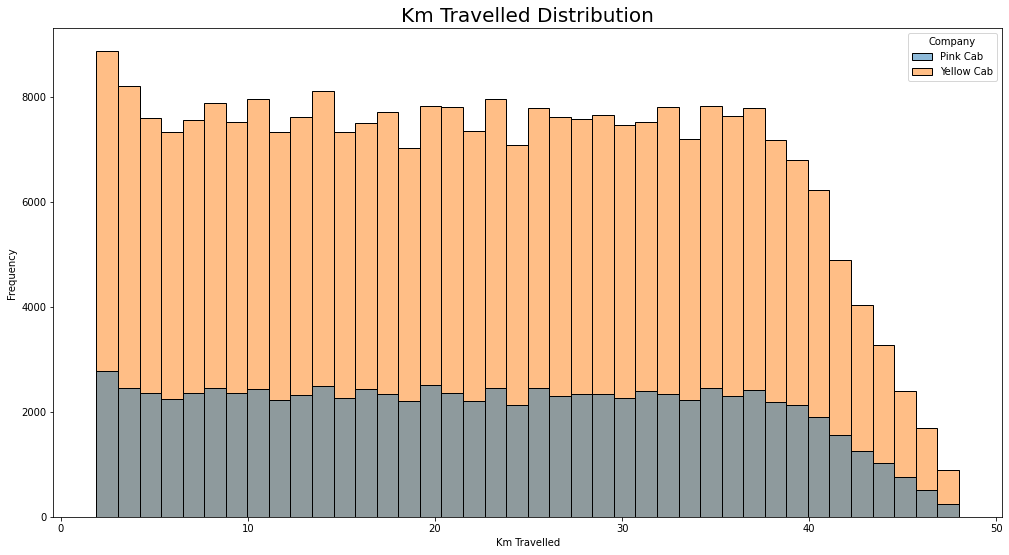

In [62]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=master_ds, x="KM Travelled",bins=40, hue="Company")
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 1.0, 'Yellow Cap')

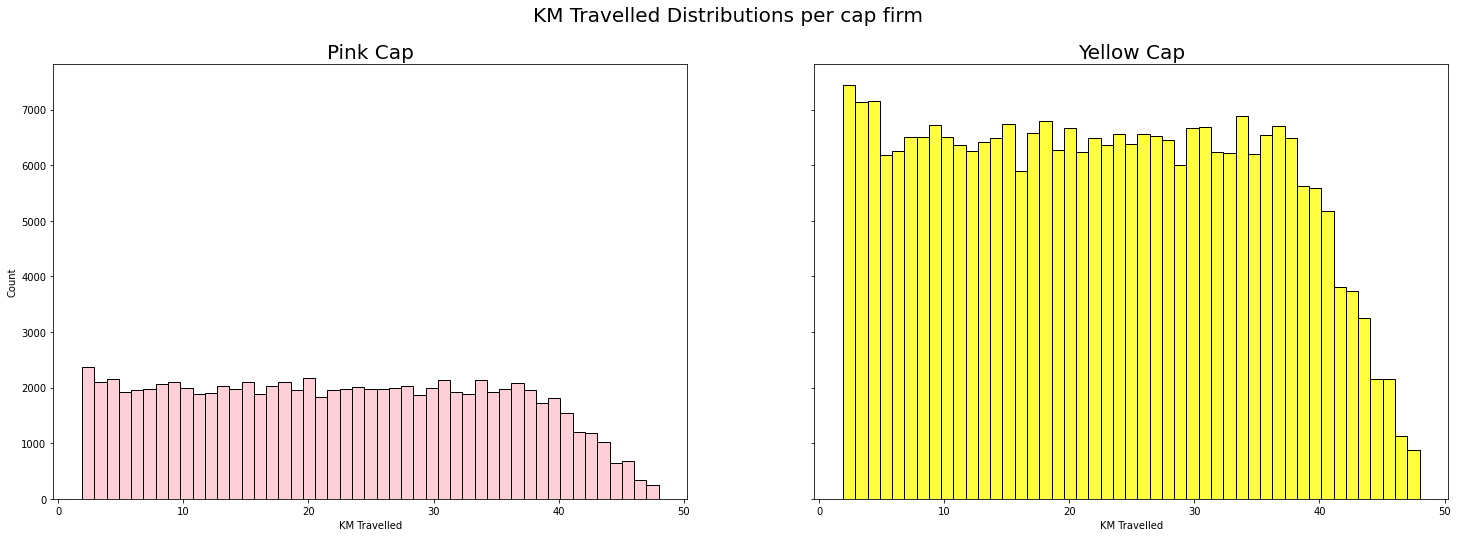

In [63]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle("KM Travelled Distributions per cap firm" , fontsize=20)
sns.histplot(ax=axes[0],data=pink_dataset, x='KM Travelled',  color="pink", bins=47).set_title("Pink Cap",fontsize=20)
sns.histplot(ax=axes[1],data=yellow_dataset, x='KM Travelled',color="yellow"  , bins=47).set_title("Yellow Cap",fontsize=20)

#### Price Charged

Text(0.5, 0, 'Population')

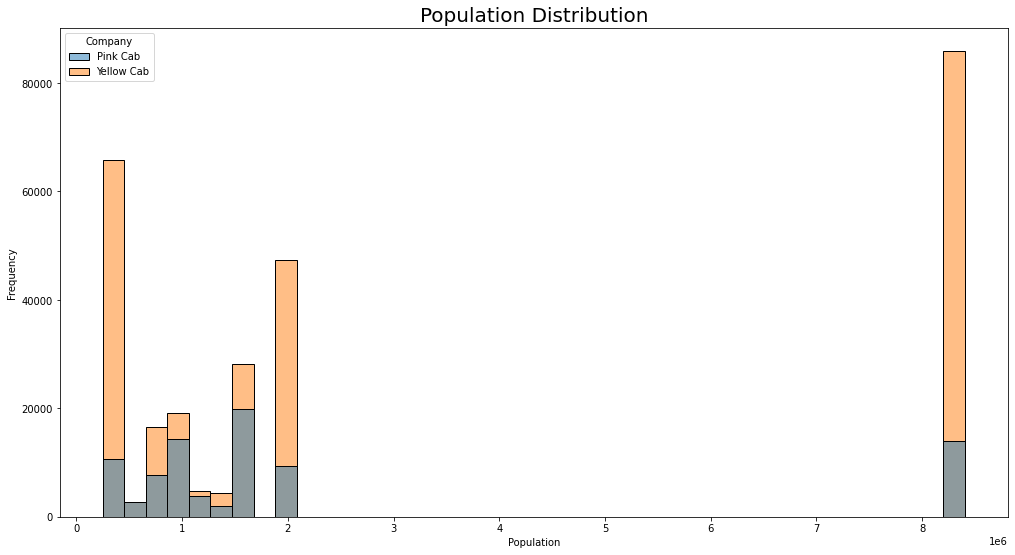

In [64]:
plt.figure(figsize=(17,9))
sns.histplot(data=master_ds, x="Population",bins=40 ,color=('Pink','Yellow'), hue="Company")
plt.title('Population Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Population')

Text(0.5, 1.0, 'Yellow Cap')

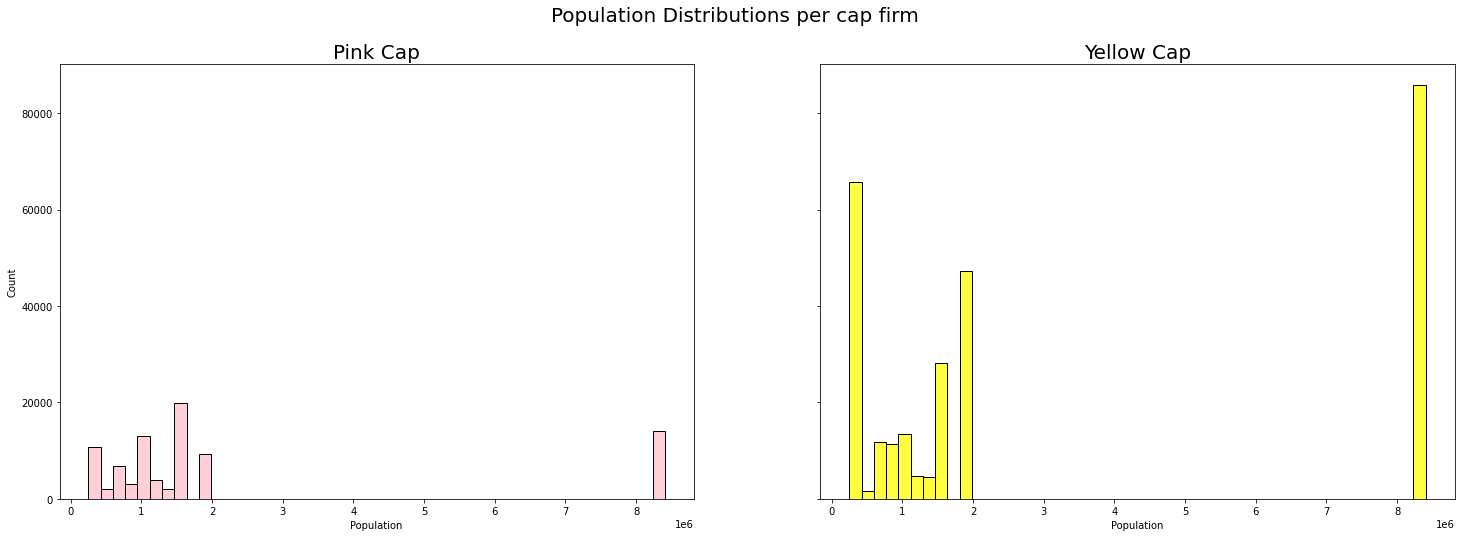

In [65]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle("Population Distributions per cap firm", fontsize=20)
sns.histplot(ax=axes[0],data=pink_dataset, x='Population',  color="pink", bins=47).set_title("Pink Cap", fontsize=20)
sns.histplot(ax=axes[1],data=yellow_dataset, x='Population',color="yellow"  , bins=47).set_title("Yellow Cap", fontsize=20)

#### Cost of Trip

Text(0.5, 0, 'Cost of Trip')

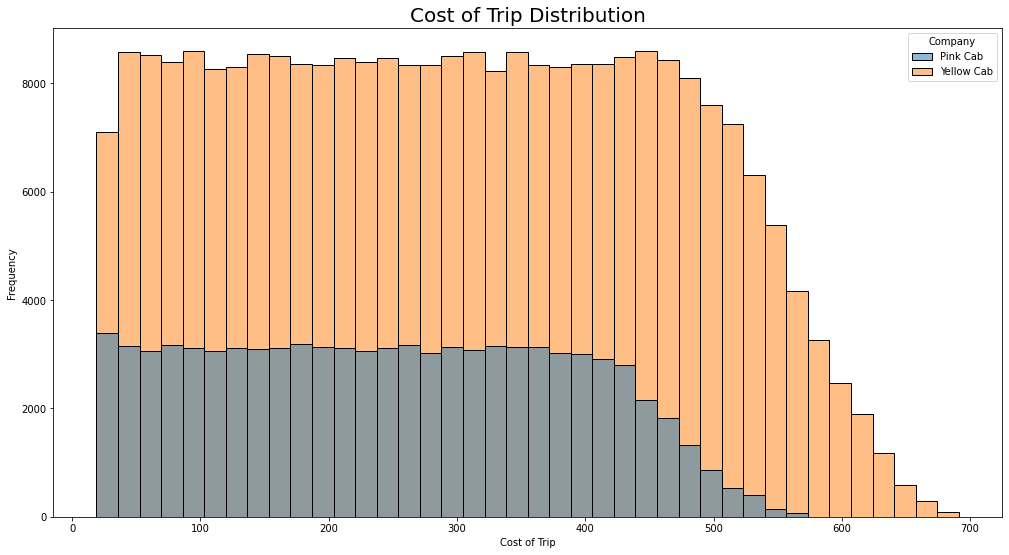

In [66]:
plt.figure(figsize=(17,9))
sns.histplot(data=master_ds, x="Cost of Trip",bins=40 , hue="Company")
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 1.0, 'Yellow Cap')

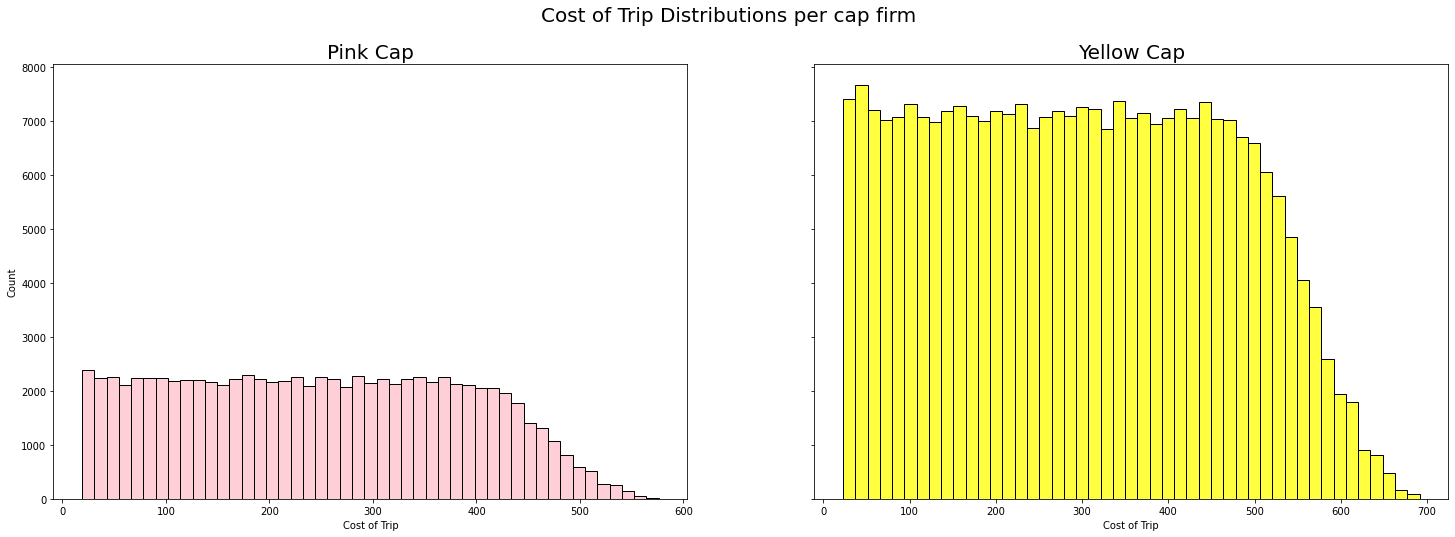

In [67]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle("Cost of Trip Distributions per cap firm", fontsize=20)
sns.histplot(ax=axes[0],data=pink_dataset, x='Cost of Trip',  color="pink", bins=47).set_title("Pink Cap", fontsize=20)
sns.histplot(ax=axes[1],data=yellow_dataset, x='Cost of Trip',color="yellow"  , bins=47).set_title("Yellow Cap", fontsize=20)

Text(0.5, 0, 'Users')

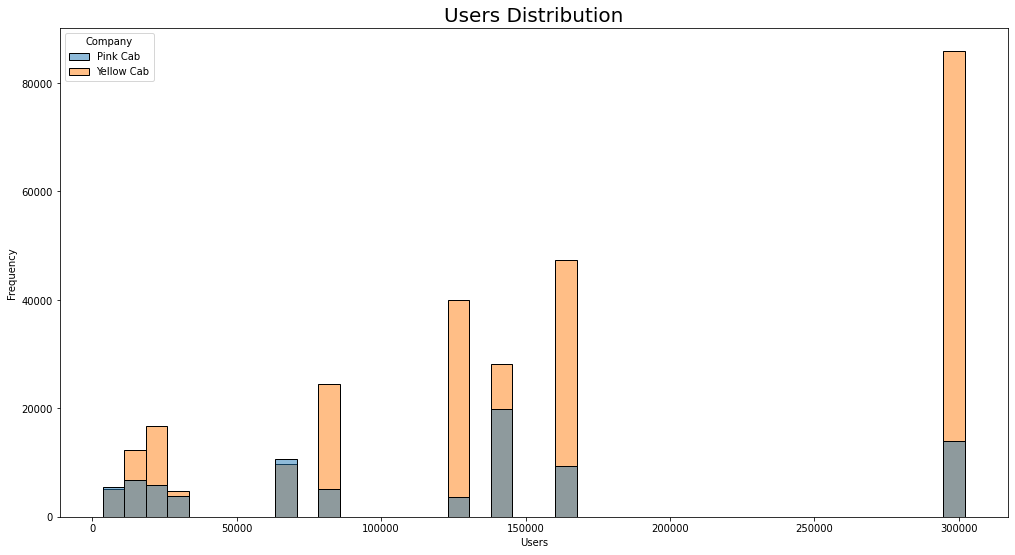

In [68]:
plt.figure(figsize=(17,9))
sns.histplot(data=master_ds, x="Users",bins=40 , hue="Company")
plt.title('Users Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Users')

Text(0.5, 1.0, 'Yellow Cap')

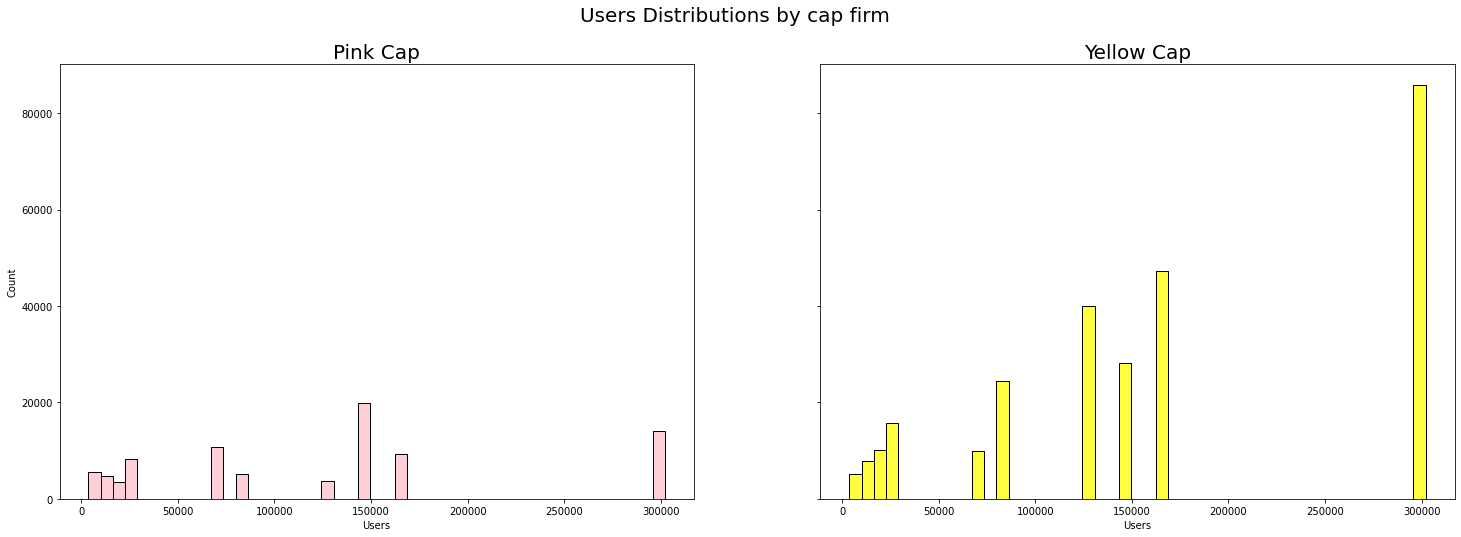

In [69]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle("Users Distributions by cap firm", fontsize=20)
sns.histplot(ax=axes[0],data=pink_dataset, x='Users',  color="pink", bins=47).set_title("Pink Cap", fontsize=20)
sns.histplot(ax=axes[1],data=yellow_dataset, x='Users',color="yellow"  , bins=47).set_title("Yellow Cap", fontsize=20)

#####  In the feature visualization all variables distribution shows that Yellow Cap Firm is much highier than Pink Cap Firm

# 6. Dataset Relation

In [70]:
selected_columns =['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']
ds_relation = master_ds[selected_columns]
ds_relation.head()

KM Travelled  Price Charged  Cost of Trip  Age  Income (USD/Month)  \
0         30.45         370.95      313.6350   28               10813   
1         26.19         598.70      317.4228   28               10813   
2         42.55         792.05      597.4020   28               10813   
3         28.62         358.52      334.8540   27                9237   
4         36.38         721.10      467.1192   27                9237   

   Population  Users  
0      814885  24701  
1      814885  24701  
2      814885  24701  
3      814885  24701  
4      814885  24701

In [71]:
corelation= ds_relation.corr()
corelation.head()

KM Travelled  Price Charged  Cost of Trip       Age  \
KM Travelled            1.000000       0.835753      0.981848 -0.000369   
Price Charged           0.835753       1.000000      0.859812 -0.003084   
Cost of Trip            0.981848       0.859812      1.000000 -0.000189   
Age                    -0.000369      -0.003084     -0.000189  1.000000   
Income (USD/Month)     -0.000544       0.003228     -0.000633  0.003907   

                    Income (USD/Month)  Population     Users  
KM Travelled                 -0.000544   -0.002311 -0.000428  
Price Charged                 0.003228    0.326589  0.281061  
Cost of Trip                 -0.000633    0.015108  0.023628  
Age                           0.003907   -0.009002 -0.005906  
Income (USD/Month)            1.000000    0.011868  0.010464

- CORRELATIONS

<AxesSubplot:>

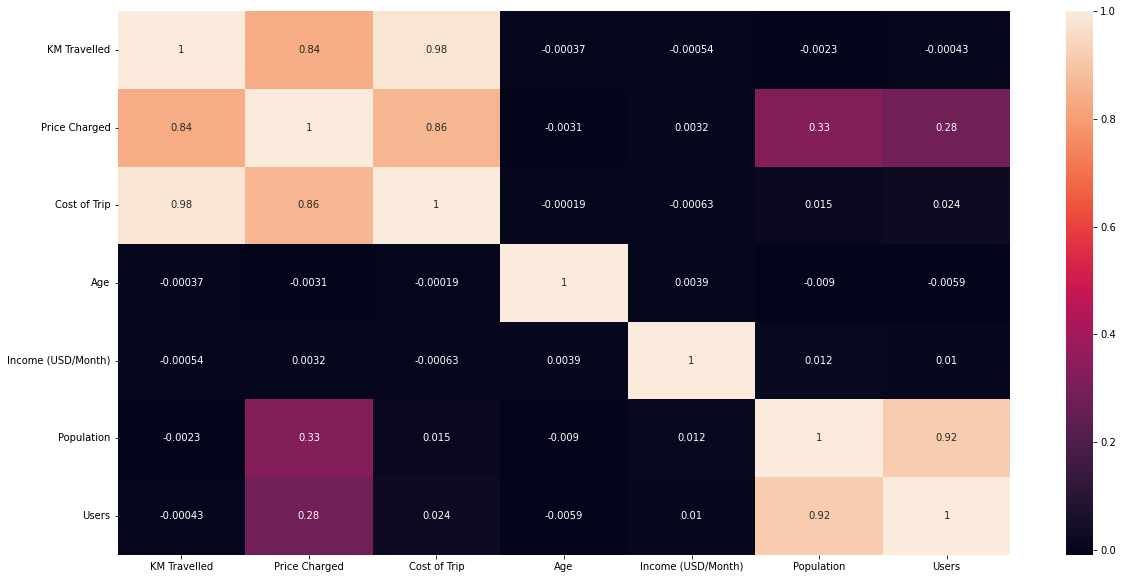

In [72]:
corelation= ds_relation.corr()
corelation.head()
plt.figure(figsize=(20,10))
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

##### From Corelation and the heatmap above it shows that the relationship between the following variables:

1. KM Travedlled and Price charged.
2. Price Charged and Cost of trip.
3. KM Travedlled and Cost of trip.
4. Users and Population.
5. Users and Price Charged 

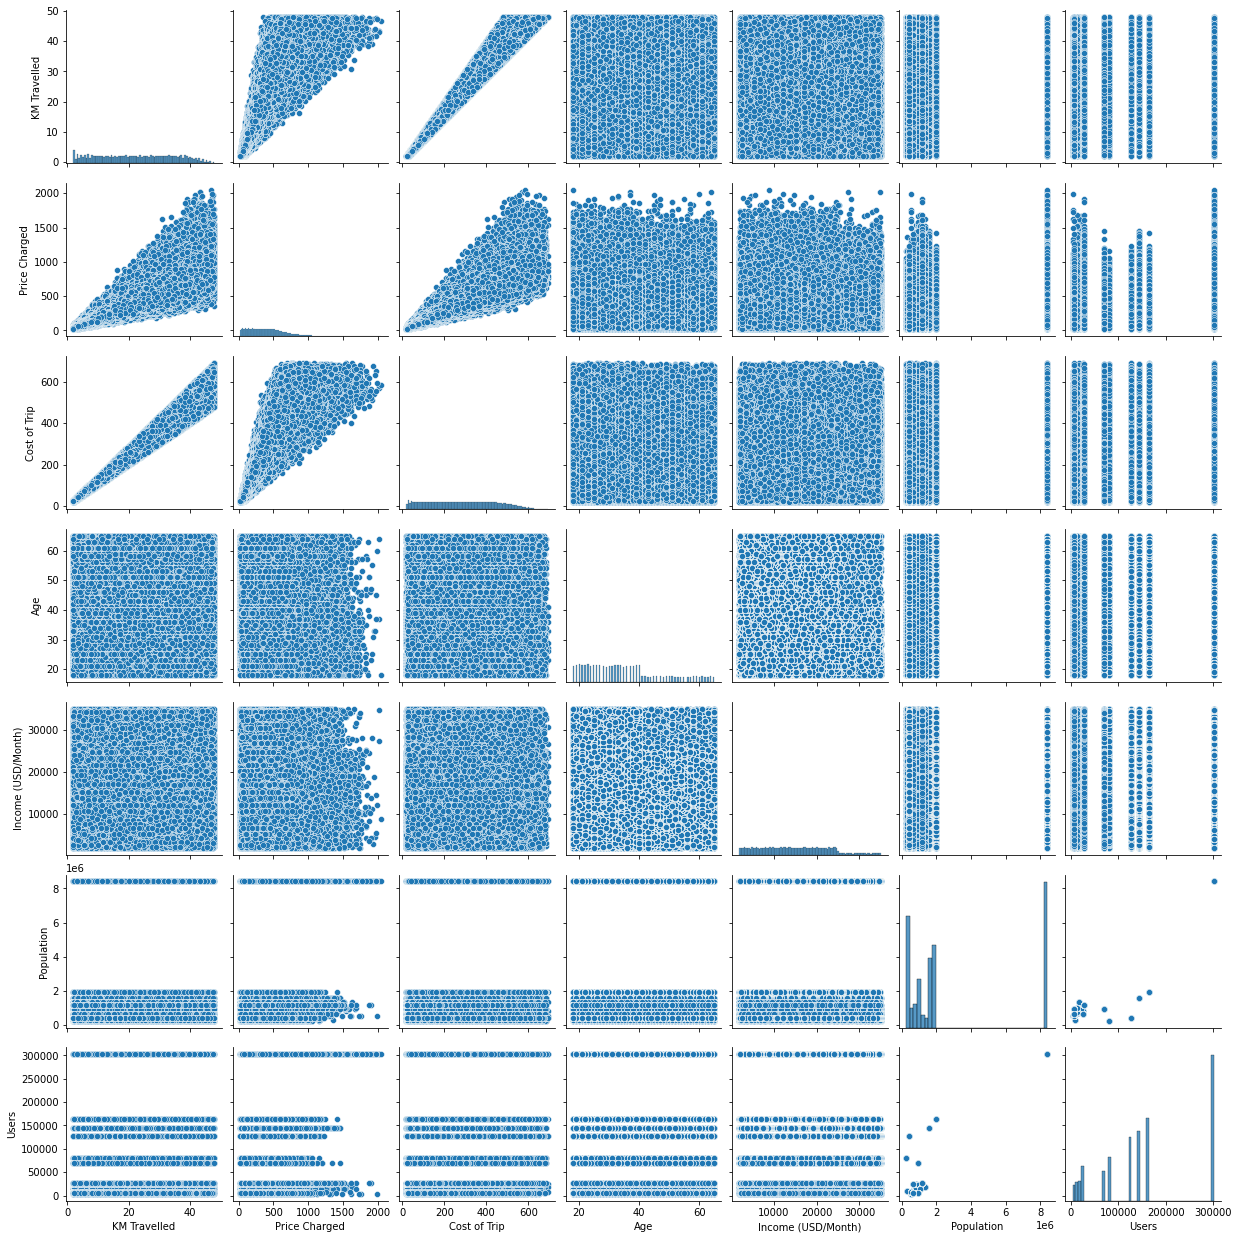

In [73]:
sns.pairplot(ds_relation)

### - KM Travelled per  Price Charged  & Cost of trip

Text(0.5, 1.0, 'Cost of Trip - KM Travelled')

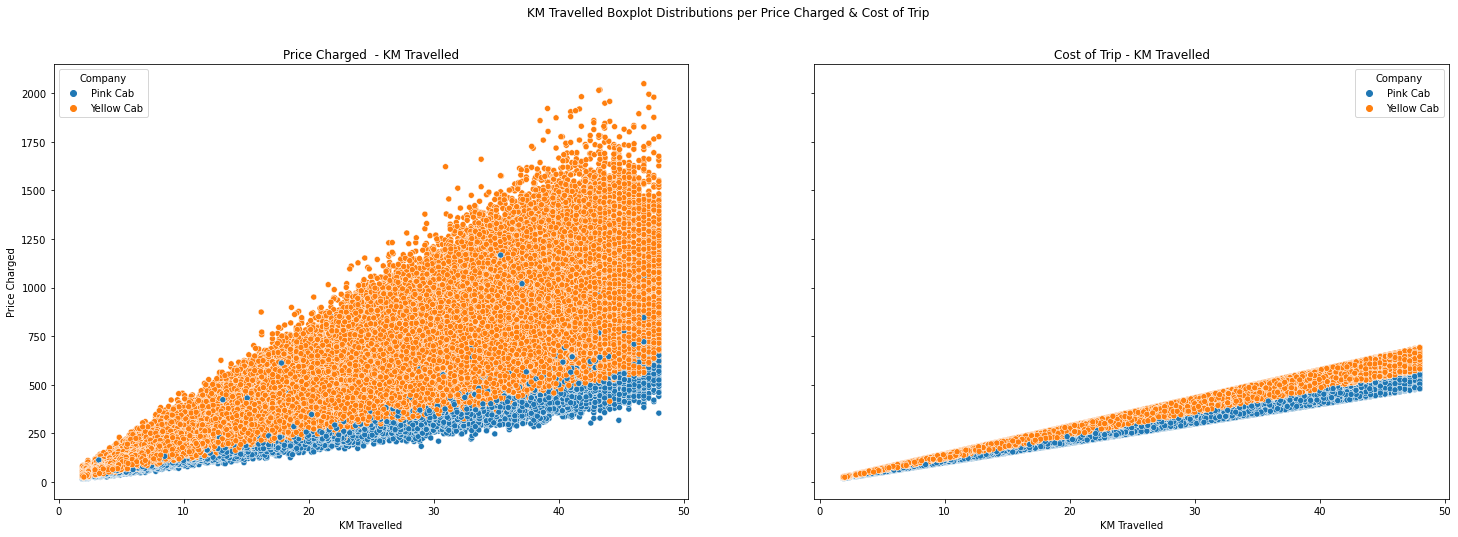

In [74]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('KM Travelled Boxplot Distributions per Price Charged & Cost of Trip')
sns.scatterplot(ax=axes[0],data=master_ds, x='KM Travelled', y='Price Charged' , hue="Company").set_title("Price Charged  - KM Travelled")
sns.scatterplot(ax=axes[1],data=master_ds, x='KM Travelled', y='Cost of Trip' , hue="Company").set_title("Cost of Trip - KM Travelled")

<AxesSubplot:xlabel='Cost of Trip', ylabel='Price Charged'>

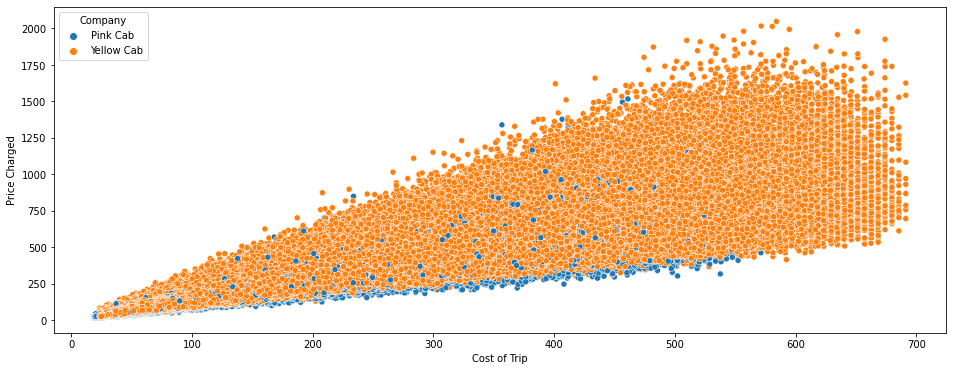

In [75]:
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
sns.scatterplot(data=master_ds,x="Cost of Trip", y="Price Charged", hue="Company")

Text(0.5, 1.0, 'Cost of Trip - KM Travelled')

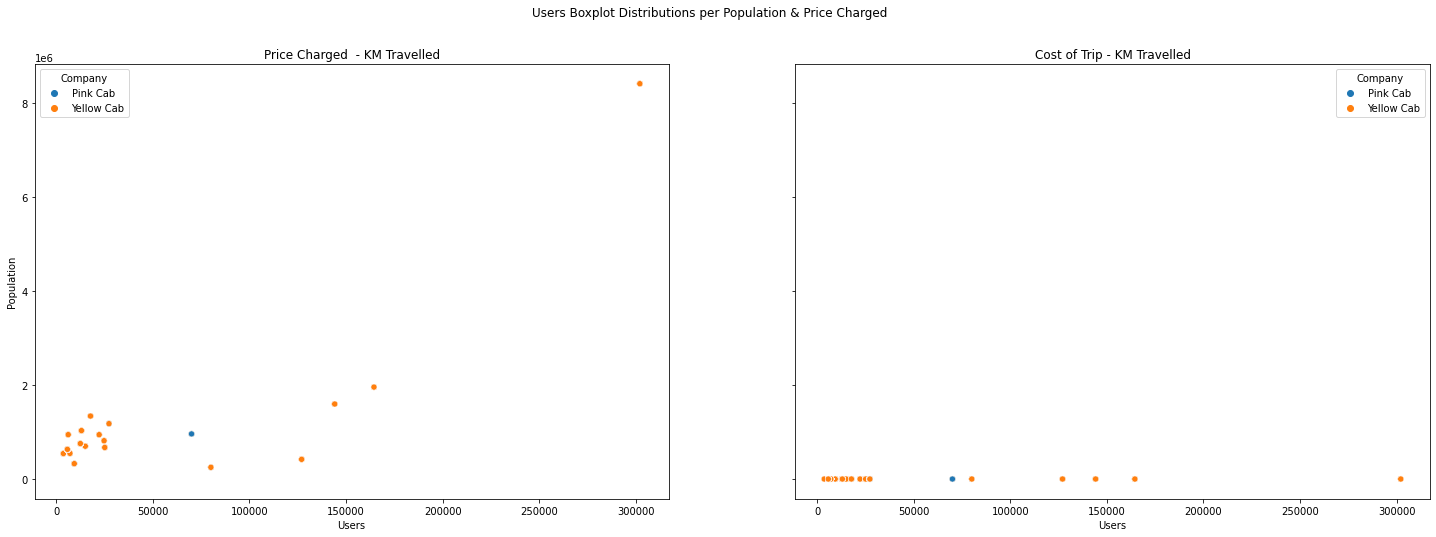

In [76]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Users Boxplot Distributions per Population & Price Charged')
sns.scatterplot(ax=axes[0],data=master_ds, x='Users', y='Population' , hue="Company").set_title("Price Charged  - KM Travelled")
sns.scatterplot(ax=axes[1],data=master_ds, x='Users', y='Price Charged' , hue="Company").set_title("Cost of Trip - KM Travelled")

## Transaction Analysis

In [77]:
master_ds_city = master_ds.groupby(['City','Company'])['Transaction ID'].size().reset_index(name='Transactions_counts')
master_ds_city.head(30)

City     Company  Transactions_counts
0       ATLANTA GA    Pink Cab                 1762
1       ATLANTA GA  Yellow Cab                 5795
2        AUSTIN TX    Pink Cab                 1868
3        AUSTIN TX  Yellow Cab                 3028
4        BOSTON MA    Pink Cab                 5186
5        BOSTON MA  Yellow Cab                24506
6       CHICAGO IL    Pink Cab                 9361
7       CHICAGO IL  Yellow Cab                47264
8        DALLAS TX    Pink Cab                 1380
9        DALLAS TX  Yellow Cab                 5637
10       DENVER CO    Pink Cab                 1394
11       DENVER CO  Yellow Cab                 2431
12  LOS ANGELES CA    Pink Cab                19865
13  LOS ANGELES CA  Yellow Cab                28168
14        MIAMI FL    Pink Cab                 2002
15        MIAMI FL  Yellow Cab                 4452
16    NASHVILLE TN    Pink Cab                 1841
17    NASHVILLE TN  Yellow Cab                 1169
18     NEW YORK NY    Pink Cab                13967
19     NEW YORK NY  Yellow Cab                85918
20   ORANGE COUNTY    Pink Cab                 1513
21   ORANGE COUNTY  Yellow Cab                 2469
22      PHOENIX AZ    Pink Cab                  864
23      PHOENIX AZ  Yellow Cab                 1200
24   PITTSBURGH PA    Pink Cab                  682
25   PITTSBURGH PA  Yellow Cab                  631
26   SACRAMENTO CA    Pink Cab                 1334
27   SACRAMENTO CA  Yellow Cab                 1033
28    SAN DIEGO CA    Pink Cab                10672
29    SAN DIEGO CA  Yellow Cab                 9816

In [78]:
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("City").count()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Transaction ID'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Transaction ID'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Transactions Distribution per City" )

In [79]:
pink_trxs_Cab = pink_dataset.groupby("City")["Transaction ID"].count()
pink_trxs_Cab = pd.DataFrame(pink_trxs_Cab)
fig1 = px.pie(pink_trxs_Cab,values=pink_trxs_Cab["Transaction ID"],names=pink_trxs_Cab.index,
              title="Total transactions by City per pink cap")
fig1.update_traces(textposition='inside',textinfo='percent+label')
fig1.update_layout( width = 700, height = 600)

In [80]:
yellow_trxs_Cab = yellow_dataset.groupby("City")["Transaction ID"].count()
yellow_trxs_Cab = pd.DataFrame(yellow_trxs_Cab)
fig1 = px.pie(yellow_trxs_Cab,
                        values=yellow_trxs_Cab["Transaction ID"],
                        names=yellow_trxs_Cab.index ,title="Total transactions by City per yellow cap"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600)

In [81]:
total_trxs_by_Cab_Firm = master_ds.groupby("Company")["Transaction ID"].count()
total_trxs_by_Cab_Firm = pd.DataFrame(total_trxs_by_Cab_Firm)
fig1 = px.pie(total_trxs_by_Cab_Firm,
                        values=total_trxs_by_Cab_Firm["Transaction ID"],
                        names=total_trxs_by_Cab_Firm.index ,title="Total transactions by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600)

### Yealy number of Transactions

In [82]:
#Pink Cap
yearly_transaction_p = pink_dataset.groupby('year')['Transaction ID'].count()
yearly_transaction_p.head()

year
2016    25285
2017    30205
2018    29221
Name: Transaction ID, dtype: int64

In [83]:
#Yellow Cap
yearly_transaction_y = yellow_dataset.groupby('year')['Transaction ID'].count()
yearly_transaction_y.head()

year
2016    82937
2017    97759
2018    93985
Name: Transaction ID, dtype: int64

In [84]:
#
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("year").count()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("year").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Transaction ID'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Transaction ID'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Transactions",
    title="Yearly Pink & Yellow Cab Firm Transactions Distribution" )

In [85]:
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("Payment_Mode").count()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("Payment_Mode").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Transaction ID'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Transaction ID'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Transactions",
    title="Pink & Yellow Cab Firm Transactions Distribution Over Payment_Mode" )

In [97]:
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("Gender").count()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Transaction ID'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Transaction ID'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Transactions",
    title="Pink & Yellow Cab Firm Transactions Distribution Over Gender" )

##### From all above analysis for transactions of both Yellow and Pink Cap Firms, the visualizations shows that Yellow cap is much higher in usage than Pink Cap.

### Users Analysis

In [87]:
total_users_by_Cab_Firm = master_ds.groupby("Company")["Users"].sum()
total_users_by_Cab_Firm = pd.DataFrame(total_users_by_Cab_Firm)
fig1 = px.pie(total_trxs_by_Cab_Firm,
                        values=total_users_by_Cab_Firm["Users"],
                        names=total_users_by_Cab_Firm.index ,title="Total users by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600 )

In [98]:
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("City").sum()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("City").sum()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Users'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm User Distribution Over City" )

### Profit Analysis

In [89]:
master_ds["Profit_of_Trip"] = master_ds["Price Charged"] - master_ds["Cost of Trip"]

In [90]:
total_trxs_by_Cab_Firm = master_ds.groupby("Company")["Profit_of_Trip"].sum()
total_trxs_by_Cab_Firm = pd.DataFrame(total_trxs_by_Cab_Firm)
fig1 = px.pie(total_trxs_by_Cab_Firm,
                        values=total_trxs_by_Cab_Firm["Profit_of_Trip"],
                        names=total_trxs_by_Cab_Firm.index ,title="Total Profit of Trip by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600)

In [91]:
#
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("year").sum()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("year").sum()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Profit_of_Trip'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Profit_of_Trip'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit",
    title="Yearly Pink & Yellow Cab Firm Profit Distribution" )

In [92]:
#
data1_0 = master_ds[master_ds["Company"] == "Pink Cab"].groupby("City").sum()
data1_1 = master_ds[master_ds["Company"] == "Yellow Cab"].groupby("City").sum()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Profit_of_Trip'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Profit_of_Trip'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit",
    title=" Pink & Yellow Cab Firm Profit Distribution Over City" )

In [93]:
total_users_by_Cab_Firm = master_ds.groupby("Company")["Profit_of_Trip"].sum()
total_users_by_Cab_Firm = pd.DataFrame(total_users_by_Cab_Firm)
fig1 = px.pie(total_trxs_by_Cab_Firm,
                        values=total_users_by_Cab_Firm["Profit_of_Trip"],
                        names=total_users_by_Cab_Firm.index ,title="Total users by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600 )

##### From the above analysis we can see that Yellow Cap Firm is much higher than Pink Cap Firm

# 7. Summary:
    From above visualizations and analysis,  and we can answer the previous comparsion questions:
    
    1. How is the performance of Yellow Cab and Pink Cab firms?
    
    From the above analysis, it seems that Yellow Cap has higher performance, as we can see each variable distripution of Yellow cap is much highier than Pink Cap. 
    
    2. Which Cap firm is prefered by the customers?
    As per the above visualizations of transactions analysis, the Yellow cap %76.4 and Pink Cap has only %23.6 tranactions as    whole and throughout the years (2016 - 2017 - 2018) the Yellow cap is approximately five times than Pink Cap for bothe Gender (Male and Female). 
    
    3. Which Cap firm covers more in the Cities?
    As per the above visualizations of transactions analysis, it is obvious that Yellow Cap Firm occupies very high percentage of coverage in both big and small cities and the most popular are (NEW YORK NY, BOSTON MA, CHICAGO IL and LOS ANGELES CA). Besides, the most users number are in the Yellow as per the analysis through the cities.
     
    4. Which Cap firm has increaed profit?
    According to "Yearly Pink & Yellow Cab Firms Profit Distribution" it shows that veriant increasing and decreasing in both cap firms through the three years(2016 , 2017 , 2018) and despit we can see decreasinf in the profit of Yellow Cap Dirm in 2018 but it still much higher than Pink Cap Firm.
    
    5. Which Cab firm have bigger market share?
    From all the above visualizations and the answers of the comparsion's questions we understand that Yellow Cap Frim is bigger than Pink Cap Firm in market Share.
  
 As as conclusion we can say the Yellow Cap Firm is highly recommened. we can say the Yellow Cap Firm is highly recommened.

#### The Final Dataset Structure:

In [94]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  category      
 3   Gender              359392 non-null  category      
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  category      
 8   City                359392 non-null  category      
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

In [95]:
master_ds.shape

(359392, 17)

In [96]:
master_ds.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'year', 'month',
       'Population', 'Users', 'Profit_of_Trip'],
      dtype='object')